In [8]:
# import the required libraries

#suppress the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import osmnx as ox
import geopandas as gpd

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import matplotlib.pyplot as plt

import numpy as np

ox.config(use_cache=True, log_console=True)

In [4]:
def extract_street_lines_to_shapefile(place_name, output_path_name):
    """
    Extract street lines (roads) data for a specified location and save it to a shapefile.

    Args:
        place_name (str): Name of the place (e.g., "Times Square, New York, NY").
        output_shapefile (str): Path to save the output shapefile.

    Returns:
        None
    """
    # custom_filter: streets containing names
    cf = '["name"!~""]'

    # Get the street network for the specified place
    G = ox.graph_from_place(place_name, network_type="all", custom_filter=cf)
    
    # Convert the graph to a GeoDataFrame of street lines
    street_lines = ox.graph_to_gdfs(G, nodes=False, edges=True)

    ox.save_graph_shapefile(G, output_path_name,  directed=False)
    #print(f"Street lines data saved to {output_path_name}")

In [5]:
place_name = "Center City Philadelphia, PA, USA"

output_path_name = r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_roads"
extract_street_lines_to_shapefile(place_name, output_path_name)

(-75.18751892499999, -75.134674375, 39.94034439, 39.96604061)

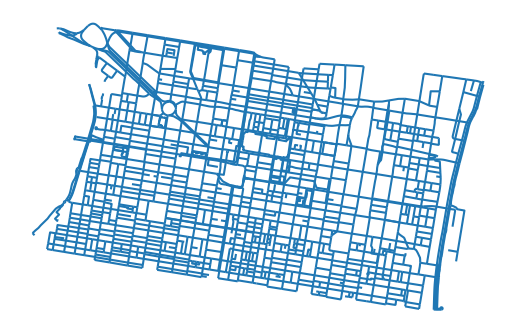

In [42]:
gdf = gpd.read_file(r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_roads/edges.shp")
ax = gdf.plot()
ax.axis('off')  # Optional: to turn off the axis

In [39]:
def sample_points(G, n):
    gdf_edges = ox.graph_to_gdfs(G, nodes=False)[['geometry', 'length']]
    weights = gdf_edges['length'] / gdf_edges['length'].sum()
    idx = np.random.choice(gdf_edges.index, size=n, p=weights)
    lines = gdf_edges.loc[idx, 'geometry']
    return lines.interpolate(lines.length * np.random.rand())

<Axes: >

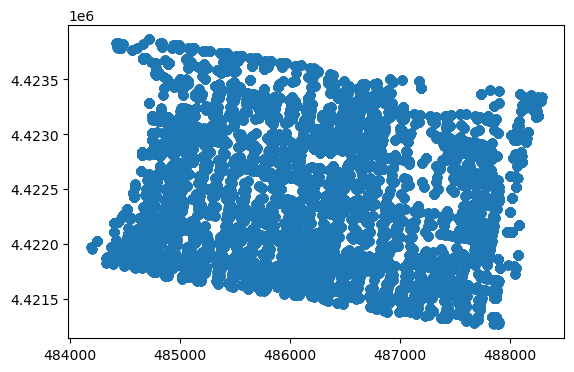

In [40]:
place_name = "Center City Philadelphia, PA, USA"
# test the sampler (use a projected graph for most accurate results)
G = ox.project_graph(ox.graph_from_place(place_name, network_type='drive',custom_filter= '["name"!~""]'))
points = sample_points(G, 100000)
points.plot()

In [41]:
points.to_file(r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_roads/points.shp")